In [ ]:
"""
MatSoc: Intro to ML Techniques
Assignment 2
Deadline: Wednesday, 3 January 2024, 23:59 IST

Name: Anshuman Singh
Roll Number: 220176
IITK Email: anshumans22@iitk.ac.in

You may use the ML library of your choice to do this part.

1. Find the best fit degree of polynomial for the given data (use the data 1 link)
2. Predict the model for the given data (use data link 2)
3. Solve this competition (use logisitic regression): https://www.kaggle.com/t/6ac9ca8159f64c4eb794206a735a61ca

Use everything you have learned till date in part 3, its a competition!!!

  Note that the code for all parts must be visible

  Make sure all the code is run before you submit the notebook

  share a link to the notebook for problem 3 in this colab notebook if you use
  a different notebook for part 3.

"""

Saving data_week2_1.csv to data_week2_1 (19).csv
The best fit degree of polynomial for the given data: 3


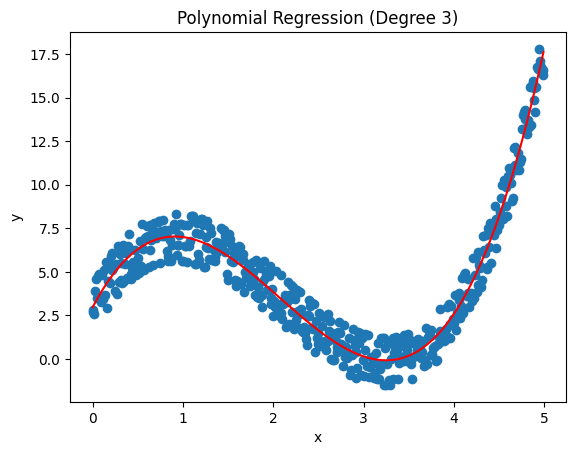

In [ ]:
# 1. Find the best fit degree of polynomial for the given data (use the data 1 link)
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('data_week2_1.csv')
columns = ['x', 'y']
data = df[columns]

data_array = data.to_numpy()

X = data_array[:, 0].reshape(-1, 1)
y = data_array[:, 1]

max_deg = 10
best_fit = 0
best_mse = float('inf')

for deg in range(1, max_deg + 1):
    poly_features = PolynomialFeatures(degree=deg)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    mse_cv = -np.mean(cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=5))
    if mse_cv < best_mse:
        best_mse = mse
        best_fit = deg

print("The best fit degree of polynomial for the given data:", best_fit)

poly_features = PolynomialFeatures(degree=best_fit)
X_poly = poly_features.fit_transform(df[['x']])
model = LinearRegression()
model.fit(X_poly, df['y'])
df['y_pred'] = model.predict(X_poly)
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'], color='red')
plt.title(f'Polynomial Regression (Degree {best_fit})')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Saving dataweek2.csv to dataweek2 (31).csv


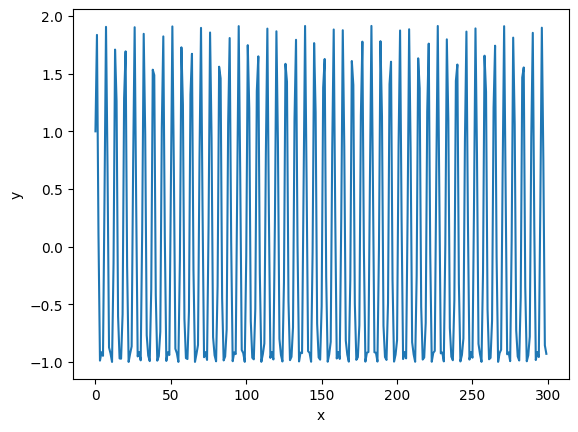

Equation of the function: y = 1.0000000000002247 * sin(x) + 1.0000000000300426 * cos(x) + 0.9999999999205503 * sin(x) * cos(x) + 8.248763138751466e-10


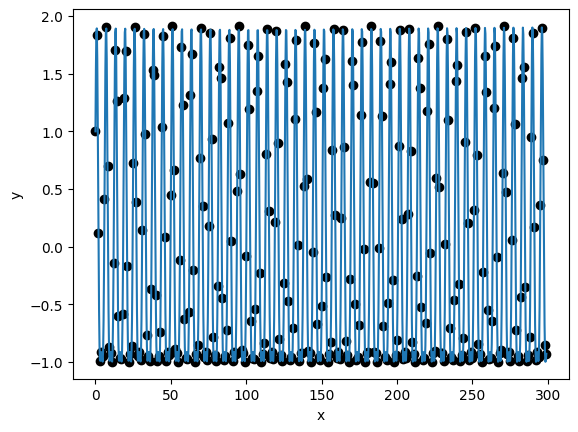

In [ ]:
# 2. Predict the model for the given data (use data link 2)
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
data = pd.read_csv('dataweek2.csv')
X = data['x'].values
y = data['y'].values
plt.plot(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# After observing curve of data I am assuming this as the function.
def wave_function(x, a, b, c, d):
    return a * np.sin(x) + b * np.cos(x) + c * np.sin(x) * np.cos(x) + d

params, covariance = curve_fit(wave_function, X, y)
a_fit, b_fit, c_fit, d_fit = params

equation = f'y = {a_fit} * sin(x) + {b_fit} * cos(x) + {c_fit} * sin(x) * cos(x) + {d_fit}'
print(f'Equation of the function: {equation}')
x_range = np.linspace(min(X), max(X), 1000)
y_fit = wave_function(x_range, a_fit, b_fit, c_fit, d_fit)

plt.scatter(X, y,color='black')
plt.plot(x_range, y_fit)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# 3. Solve this competition (use logisitic regression)
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from google.colab import files
from google.colab import drive
drive.mount('drive')
uploaded = files.upload()
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
train_df = df_train.copy()
test_df = df_test.copy()
df_train.shape, df_test.shape
target = df_train["Transported"]
test_id = df_test["PassengerId"]
train_df = train_df.drop(["Transported"], axis = 1)
data = pd.concat([train_df, test_df], axis = 0).reset_index(drop = True)

data_1 = data.copy()

list_missing_cat_columns = list((data_1.select_dtypes(['object', 'category']).isna().sum() > 0).index)
for col in list_missing_cat_columns:
    data_1[col] = data_1[col].fillna(data_1[col].mode()[0])

list_missing_numeric_col = list((data_1.select_dtypes(np.number).isna().sum() > 0).index)
def fill_nans(df):
    df["RoomService"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["RoomService"])
    df["FoodCourt"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["FoodCourt"])
    df["ShoppingMall"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["ShoppingMall"])
    df["Spa"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["Spa"])
    df["VRDeck"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["VRDeck"])

    return df

data_1 = fill_nans(data_1)

for col in list_missing_numeric_col:
    data_1[col] = data_1[col].fillna(data_1[col].mean())
data_1.isna().sum()

def clipping_quantile(dataframe, quantile_values = None, quantile = 0.99):
    df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].quantile(quantile)
    for num_column in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values
    return df

data_1 = clipping_quantile(data_1, None, 0.99)

def extract_features(df):
    df["PassengerGroup"] = (df["PassengerId"].str.split('_', expand = True))[0]

    No_Passenger = df.groupby('PassengerGroup').aggregate({'PassengerId': 'size'}).reset_index()
    No_Passenger = No_Passenger.rename(columns = {"PassengerId": "NoInPassengerGroup"})
    No_Passenger["IsAlone"] = No_Passenger["NoInPassengerGroup"].apply(lambda x: "Not Alone" if x > 1 else "Alone")

    df = df.merge(No_Passenger[["PassengerGroup", "IsAlone"]], how = 'left', on = ['PassengerGroup'])
    df["CabinDeck"] = df["Cabin"].str.split('/', expand = True)[0]
    df["DeckPosition"] = df["CabinDeck"].apply(lambda deck: "Lower" if deck in ('A', 'B', 'C', 'D') else "Higher" )
    df["CabinSide"] = df["Cabin"].str.split('/', expand = True)[2]
    df["Regular"] = df["FoodCourt"] + df["ShoppingMall"]
    df["Luxury"] = df["RoomService"] + df["Spa"] + df["VRDeck"]
    df["TotalSpendings"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

    Wealthiest_Deck = df.groupby('CabinDeck').aggregate({'TotalSpendings': 'sum', 'PassengerId': 'size'}).reset_index()
    Wealthiest_Deck['DeckAverageSpent'] = Wealthiest_Deck['TotalSpendings'] / Wealthiest_Deck['PassengerId']

    df = df.merge(Wealthiest_Deck[["CabinDeck", "DeckAverageSpent"]], how = 'left', on = ['CabinDeck'])
    df["FamilyName"] = df["Name"].str.split(' ', expand = True)[1]

    NoRelatives = df.groupby('FamilyName')['PassengerId'].count().reset_index()
    NoRelatives = NoRelatives.rename(columns = {"PassengerId": "NoRelatives"})

    df = df.merge(NoRelatives[["FamilyName", "NoRelatives"]], how = 'left', on = ['FamilyName'])
    df["FamilySizeCat"] = pd.cut(df.NoRelatives, bins = [0, 2, 5, 10, 300], labels = ['0 - 2', '3 - 5', '6 - 10', '11 - 208'])

    return df

data_2 = data_1.copy()
data_2 = extract_features(data_2)
data_3 = data_2.copy()
irrelevant_columns = ["Cabin", "PassengerId", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name", "FamilyName", "PassengerGroup"]
data_3 = data_3.drop(irrelevant_columns, axis = 1)
data_3 = pd.get_dummies(data_3, columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinSide', 'IsAlone'])

for col in ['CabinDeck', 'DeckPosition', 'FamilySizeCat']:
    data_3[col], _ = data_3[col].factorize()

data_4 = data_3.copy()
train_data_final = data_4.loc[:train_df.index.max(),  :].copy()
test_data_final = data_4.loc[train_df.index.max() + 1:, :].reset_index(drop = True).copy()

X = train_data_final.copy()
y = target.astype(int)

chi_selector = SelectKBest(chi2, k = 22).fit(X, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:, chi_support].columns
chi_feature
X = X[chi_feature]


baseline_model = RandomForestClassifier(random_state = 1)
baseline_model.fit(X, y)
result = cross_val_score(baseline_model, X, y, cv = 20, scoring = "accuracy")


model_final = RandomForestClassifier(max_depth=11, n_estimators=101, random_state=1)
model_final.fit(X, y)
result_final = cross_val_score(model_final, X, y, cv = 20, scoring = "accuracy")

print(np.mean(result_final))
print(np.std(result_final))

prediction = model_final.predict(test_data_final[chi_feature])
pred_dict = {"PassengerId" : df_test["PassengerId"], "Transported": prediction}
pred_df = pd.DataFrame(pred_dict)
pred_df["Transported"] = pred_df["Transported"].map({1 : True, 0: False})
pred_df.to_csv("submission.csv", index = False)
!cp submission.csv "drive/My Drive/"
print(pred_df.to_string(index=False))

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


Saving train.csv to train (11).csv
Saving test.csv to test (11).csv
0.8047907728163567
0.018872624931449773
PassengerId  Transported
    0013_01         True
    0018_01        False
    0019_01         True
    0021_01         True
    0023_01         True
    0027_01         True
    0029_01         True
    0032_01         True
    0032_02         True
    0033_01         True
    0037_01        False
    0040_01        False
    0040_02         True
    0042_01        False
    0046_01        False
    0046_02        False
    0046_03        False
    0047_01         True
    0047_02         True
    0047_03        False
    0048_01         True
    0049_01        False
    0054_01         True
    0054_02         True
    0054_03        False
    0055_01        False
    0057_01         True
    0059_01         True
    0060_01         True
    0063_01         True
    0065_01         True
    0075_01        False
    0079_01         True
    0080_01         True
    0083_01      